In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd /content/drive/MyDrive/category_classification
%cd /content/drive/MyDrive/BIZZI/nlp_task/category_classification

/content/drive/.shortcut-targets-by-id/1YcXPsu1fjrXWlQ7YXmbfnXBf-B7FeTOT/category_classification


In [ ]:
def show_learning_curve(log):
    train_loss = [
                each["train loss"] for each in log
    ]
    val_loss = [
                each["val loss"] for each in log
    ]
    train_acc = [
                each["train accuracy"] for each in log
    ]
    val_acc = [
            each["val accuracy"] for each in log
    ]



    fig, ax = plt.subplots(figsize=(14, 8))

    epochs = len(train_loss)
    plt.plot(np.arange(epochs), train_loss, marker='o', label='train_loss')
    plt.plot(np.arange(epochs), val_loss, marker='o', label='val_loss')
    plt.plot(np.arange(epochs), train_acc, marker='o', label='train_acc')
    plt.plot(np.arange(epochs), val_acc, marker='o', label='val_acc')
    # plt.plot(np.arange(epochs), train_f1_score, marker='o', label='train_f1_score')
    # plt.plot(np.arange(epochs), val_f1_score, marker='o', label='val_f1_score')
    plt.title('vncorenlp without specific-domain vocabulary added and have model pretrained', fontsize=14)
    plt.xlabel('Epoch', fontsize=14)
    plt.grid(True)
    ax.legend()
    plt.show();

In [ ]:
# !pip install -r requirements.txt

!pip install transformers
!pip install vncorenlp

import matplotlib.pyplot as plt
import numpy as np
import json


# without pretraing

## Lần 1

In [ ]:
!python3 main.py -epochs 25 -lr 2e-5

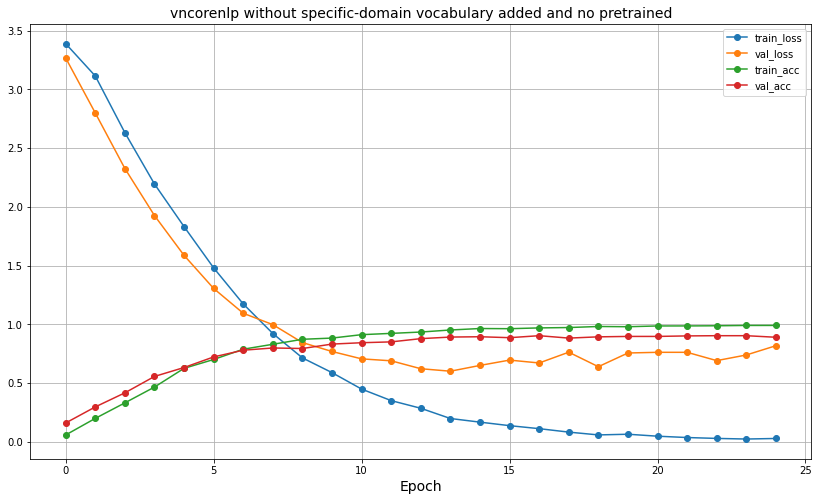

In [ ]:
log = [
       {"epoch": 1,"train loss": 3.388944153274809,"val loss": 3.267030,"train accuracy": 0.059813,"val accuracy": 0.161809,"train f1_score": 0.043944,"val f1_score": 0.122204},
       {"epoch": 2,"train loss": 3.113881066441536,"val loss": 2.799122,"train accuracy": 0.200852,"val accuracy": 0.298445,"train f1_score": 0.173877,"val f1_score": 0.272437},
       {"epoch": 3,"train loss": 2.6313176240239824,"val loss": 2.326754,"train accuracy": 0.332930,"val accuracy": 0.418260,"train f1_score": 0.309062,"val f1_score": 0.378387},
       {"epoch": 4,"train loss": 2.1949620619416237,"val loss": 1.926517,"train accuracy": 0.467293,"val accuracy": 0.557661,"train f1_score": 0.450524,"val f1_score": 0.541034},
       {"epoch": 5,"train loss": 1.832178418125425,"val loss": 1.587659,"train accuracy": 0.626664,"val accuracy": 0.633612,"train f1_score": 0.626644,"val f1_score": 0.634378},
       {"epoch": 6,"train loss": 1.481147447867053,"val loss": 1.306195,"train accuracy": 0.701926,"val accuracy": 0.723762,"train f1_score": 0.710606,"val f1_score": 0.732187},
       {"epoch": 7,"train loss": 1.1743280648120813,"val loss": 1.095137,"train accuracy": 0.789538,"val accuracy": 0.781020,"train f1_score": 0.802360,"val f1_score": 0.785980},
       {"epoch": 8,"train loss": 0.9228057472833565,"val loss": 0.998465,"train accuracy": 0.831267,"val accuracy": 0.799856,"train f1_score": 0.839916,"val f1_score": 0.813257},
       {"epoch": 9,"train loss": 0.7154077272862196,"val loss": 0.845705,"train accuracy": 0.873781,"val accuracy": 0.795334,"train f1_score": 0.884571,"val f1_score": 0.806710},
       {"epoch": 10,"train loss": 0.5900756769946643,"val loss": 0.769967,"train accuracy": 0.884104,"val accuracy": 0.832978,"train f1_score": 0.891279,"val f1_score": 0.838153},
       {"epoch": 11,"train loss": 0.4500653353918876,"val loss": 0.707195,"train accuracy": 0.913122,"val accuracy": 0.844556,"train f1_score": 0.918619,"val f1_score": 0.855347},
       {"epoch": 12,"train loss": 0.35188715332852943,"val loss": 0.690689,"train accuracy": 0.924055,"val accuracy": 0.851728,"train f1_score": 0.928049,"val f1_score": 0.860301},
       {"epoch": 13,"train loss": 0.2868660770223609,"val loss": 0.623342,"train accuracy": 0.935495,"val accuracy": 0.879291,"train f1_score": 0.939800,"val f1_score": 0.884587},
       {"epoch": 14,"train loss": 0.19973616794283902,"val loss": 0.602193,"train accuracy": 0.952918,"val accuracy": 0.892742,"train f1_score": 0.955931,"val f1_score": 0.891075},
       {"epoch": 15,"train loss": 0.1688206089394433,"val loss": 0.651431,"train accuracy": 0.965402,"val accuracy": 0.895449,"train f1_score": 0.967651,"val f1_score": 0.894505},
       {"epoch": 16,"train loss": 0.1389411479966449,"val loss": 0.696728,"train accuracy": 0.963903,"val accuracy": 0.887471,"train f1_score": 0.965116,"val f1_score": 0.895007},
       {"epoch": 17,"train loss": 0.11334898193100733,"val loss": 0.672252,"train accuracy": 0.970600,"val accuracy": 0.904349,"train f1_score": 0.972241,"val f1_score": 0.905533},
       {"epoch": 18,"train loss": 0.08397581501464758,"val loss": 0.763959,"train accuracy": 0.973721,"val accuracy": 0.883900,"train f1_score": 0.974712,"val f1_score": 0.885287},
       {"epoch": 19,"train loss": 0.06012372951954603,"val loss": 0.640620,"train accuracy": 0.982701,"val accuracy": 0.894585,"train f1_score": 0.983515,"val f1_score": 0.897125},
       {"epoch": 20,"train loss": 0.06592695306920048,"val loss": 0.757182,"train accuracy": 0.980696,"val accuracy": 0.898157,"train f1_score": 0.981895,"val f1_score": 0.899623},
       {"epoch": 21,"train loss": 0.04927648530740823,"val loss": 0.762973,"train accuracy": 0.987165,"val accuracy": 0.898185,"train f1_score": 0.987930,"val f1_score": 0.901680},
       {"epoch": 22,"train loss": 0.03785887808771804,"val loss": 0.762937,"train accuracy": 0.987444,"val accuracy": 0.902535,"train f1_score": 0.988127,"val f1_score": 0.902006},
       {"epoch": 23,"train loss": 0.030363053615604128,"val loss": 0.692314,"train accuracy": 0.988788,"val accuracy": 0.904378,"train f1_score": 0.989395,"val f1_score": 0.905350},
       {"epoch": 24,"train loss": 0.025110449001658708,"val loss": 0.740292,"train accuracy": 0.991578,"val accuracy": 0.904349,"train f1_score": 0.991868,"val f1_score": 0.904226},
       {"epoch": 25,"train loss": 0.029880970450384275,"val loss": 0.819035,"train accuracy": 0.991629,"val accuracy": 0.891071,"train f1_score": 0.991950,"val f1_score": 0.894999}
]
train_loss = [
              each["train loss"] for each in log
]
val_loss = [
            each["val loss"] for each in log
]
train_acc = [
             each["train accuracy"] for each in log
]
val_acc = [
           each["val accuracy"] for each in log
]

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(14, 8))

epochs = len(train_loss)
plt.plot(np.arange(epochs), train_loss, marker='o', label='train_loss')
plt.plot(np.arange(epochs), val_loss, marker='o', label='val_loss')
plt.plot(np.arange(epochs), train_acc, marker='o', label='train_acc')
plt.plot(np.arange(epochs), val_acc, marker='o', label='val_acc')
# plt.plot(np.arange(epochs), train_f1_score, marker='o', label='train_f1_score')
# plt.plot(np.arange(epochs), val_f1_score, marker='o', label='val_f1_score')
plt.title('vncorenlp without specific-domain vocabulary added and no pretrained', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.grid(True)
ax.legend()
plt.show();

## Lần 2

In [ ]:
!python3 main.py -epochs 20 -lr 2e-5

Device: cuda
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly in

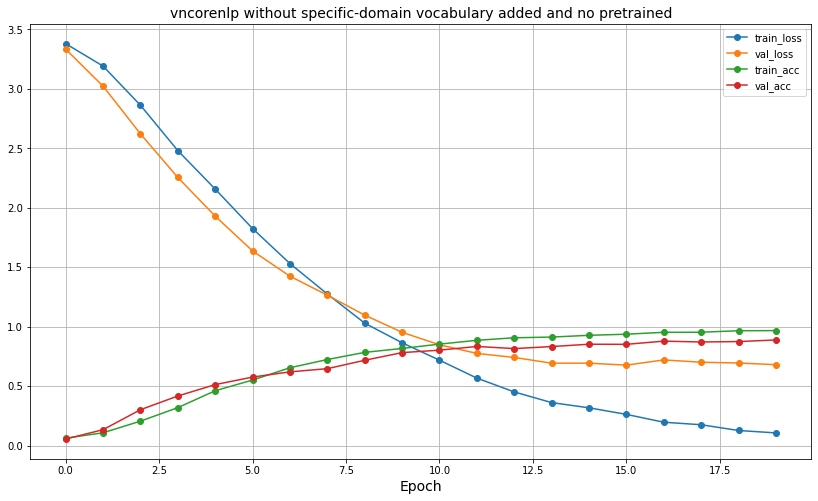

In [ ]:
log = [
       {"epoch": 0,  "train loss": 3.379491916724614, "val loss": 3.333211, "train accuracy": 0.062552,  "val accuracy": 0.055357, "train f1_score": 0.048919, "val f1_score": 0.039016},
       {"epoch": 1,  "train loss": 3.1907269890819276, "val loss": 3.022554, "train accuracy": 0.108032,  "val accuracy": 0.134044, "train f1_score": 0.073434, "val f1_score": 0.090834},
       {"epoch": 2,  "train loss": 2.861673348716327, "val loss": 2.621020, "train accuracy": 0.205771,  "val accuracy": 0.301987, "train f1_score": 0.177923, "val f1_score": 0.253830},
       {"epoch": 3,  "train loss": 2.4802839468632425, "val loss": 2.254539, "train accuracy": 0.319362,  "val accuracy": 0.417252, "train f1_score": 0.293644, "val f1_score": 0.400779},
       {"epoch": 4,  "train loss": 2.1567363685795238, "val loss": 1.928977, "train accuracy": 0.461609,  "val accuracy": 0.513018, "train f1_score": 0.447979, "val f1_score": 0.480320},
       {"epoch": 5,  "train loss": 1.824655902172838, "val loss": 1.636661, "train accuracy": 0.551329,  "val accuracy": 0.576296, "train f1_score": 0.547947, "val f1_score": 0.561773},
       {"epoch": 6,  "train loss": 1.5305894911289215, "val loss": 1.424193, "train accuracy": 0.654896,  "val accuracy": 0.620219, "train f1_score": 0.660735, "val f1_score": 0.610795},
       {"epoch": 7,  "train loss": 1.2743680413280214, "val loss": 1.264791, "train accuracy": 0.723917,  "val accuracy": 0.647033, "train f1_score": 0.731688, "val f1_score": 0.657439},
       {"epoch": 8,  "train loss": 1.0295314453542233, "val loss": 1.097073, "train accuracy": 0.784061,  "val accuracy": 0.717598, "train f1_score": 0.793259, "val f1_score": 0.719533},
       {"epoch": 9,  "train loss": 0.864543874615005, "val loss": 0.952631, "train accuracy": 0.817037,  "val accuracy": 0.782028, "train f1_score": 0.829232, "val f1_score": 0.787665},
       {"epoch": 10, "train loss": 0.71826244172241, "val loss": 0.847775, "train accuracy": 0.853309,  "val accuracy": 0.802563, "train f1_score": 0.861867, "val f1_score": 0.811629},
       {"epoch": 11, "train loss": 0.5675657617726496, "val loss": 0.775165, "train accuracy": 0.885499,  "val accuracy": 0.833813, "train f1_score": 0.890883, "val f1_score": 0.844302},
       {"epoch": 12, "train loss": 0.4513317246788314, "val loss": 0.741368, "train accuracy": 0.906653,  "val accuracy": 0.815870, "train f1_score": 0.912852, "val f1_score": 0.827722},
       {"epoch": 13, "train loss": 0.361700021661818, "val loss": 0.693052, "train accuracy": 0.912688,  "val accuracy": 0.832892, "train f1_score": 0.919902, "val f1_score": 0.846001},
       {"epoch": 14, "train loss": 0.3177886993757316, "val loss": 0.693256, "train accuracy": 0.927404,  "val accuracy": 0.852535, "train f1_score": 0.933191, "val f1_score": 0.857169},
       {"epoch": 15, "train loss": 0.2626204205943005, "val loss": 0.676569, "train accuracy": 0.936839,  "val accuracy": 0.851671, "train f1_score": 0.941216, "val f1_score": 0.864357},
       {"epoch": 16, "train loss": 0.19666165672242641, "val loss": 0.720621, "train accuracy": 0.952743,  "val accuracy": 0.878456, "train f1_score": 0.956128, "val f1_score": 0.877571},
       {"epoch": 17, "train loss": 0.17551104042546026, "val loss": 0.701169, "train accuracy": 0.953301,  "val accuracy": 0.871400, "train f1_score": 0.955855, "val f1_score": 0.876364},
       {"epoch": 18, "train loss": 0.12716414859252317, "val loss": 0.694620, "train accuracy": 0.965960,  "val accuracy": 0.874885, "train f1_score": 0.967943, "val f1_score": 0.872725},
       {"epoch": 19, "train loss": 0.10688363554488335, "val loss": 0.680484, "train accuracy": 0.967024,  "val accuracy": 0.888335, "train f1_score": 0.969155, "val f1_score": 0.895974},      
]


train_loss = [
              each["train loss"] for each in log
]
val_loss = [
            each["val loss"] for each in log
]
train_acc = [
             each["train accuracy"] for each in log
]
val_acc = [
           each["val accuracy"] for each in log
]



fig, ax = plt.subplots(figsize=(14, 8))

epochs = len(train_loss)
plt.plot(np.arange(epochs), train_loss, marker='o', label='train_loss')
plt.plot(np.arange(epochs), val_loss, marker='o', label='val_loss')
plt.plot(np.arange(epochs), train_acc, marker='o', label='train_acc')
plt.plot(np.arange(epochs), val_acc, marker='o', label='val_acc')
# plt.plot(np.arange(epochs), train_f1_score, marker='o', label='train_f1_score')
# plt.plot(np.arange(epochs), val_f1_score, marker='o', label='val_f1_score')
plt.title('vncorenlp without specific-domain vocabulary added and no pretrained', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.grid(True)
ax.legend()
plt.show();

## Lần 3

In [ ]:
!python3 main.py -epochs 20 -lr 2e-4

Device: cuda
{'device': 'cuda', 'learning rate': 2e-05}
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkp

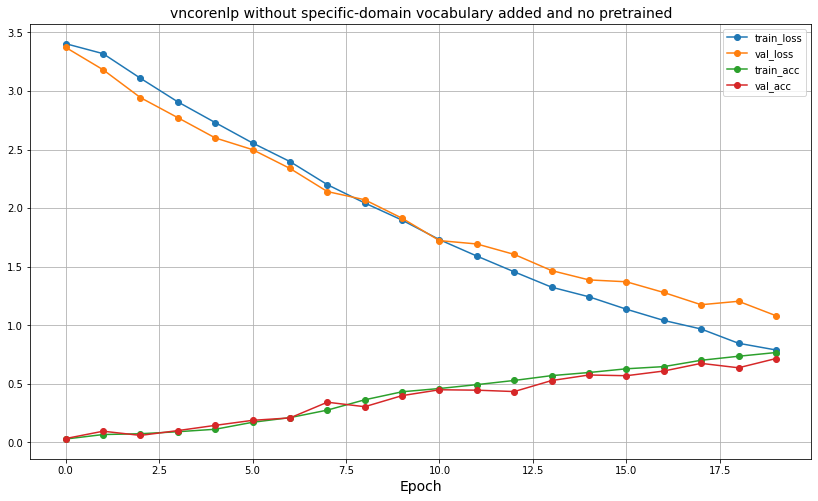

In [ ]:
log = [{'epoch': 0, 'train loss': 3.4035808507885252, 'val loss': 3.371753638131278, 'train accuracy': 0.028893849206349208, 'val accuracy': 0.03306451612903226, 'train f1_score': 0.02208342289634675, 'val f1_score': 0.008579581705647168}, {'epoch': 1, 'train loss': 3.3184296169451306, 'val loss': 3.181248460497175, 'train accuracy': 0.06722263558201058, 'val accuracy': 0.09559331797235023, 'train f1_score': 0.047698837516973326, 'val f1_score': 0.03850108521983293}, {'epoch': 2, 'train loss': 3.1083309331110547, 'val loss': 2.9431332315717427, 'train accuracy': 0.07404307208994709, 'val accuracy': 0.05987903225806451, 'train f1_score': 0.05510878812177067, 'val f1_score': 0.029089240798733547}, {'epoch': 3, 'train loss': 2.9068220257759094, 'val loss': 2.7718405859810966, 'train accuracy': 0.09129050925925927, 'val accuracy': 0.10095046082949309, 'train f1_score': 0.08519901658155006, 'val f1_score': 0.07821828377693699}, {'epoch': 4, 'train loss': 2.7301733834402904, 'val loss': 2.5991900375911166, 'train accuracy': 0.11232018849206349, 'val accuracy': 0.14556451612903226, 'train f1_score': 0.09176745116558029, 'val f1_score': 0.08673729160847023}, {'epoch': 5, 'train loss': 2.5557398051023483, 'val loss': 2.4990586178643364, 'train accuracy': 0.17195767195767195, 'val accuracy': 0.188536866359447, 'train f1_score': 0.1417887483918039, 'val f1_score': 0.147291560004143}, {'epoch': 6, 'train loss': 2.3971491370882307, 'val loss': 2.3386003868920464, 'train accuracy': 0.21157820767195767, 'val accuracy': 0.20918778801843319, 'train f1_score': 0.1818881975371329, 'val f1_score': 0.1715949253319645}, {'epoch': 7, 'train loss': 2.2002488183123723, 'val loss': 2.141212603024074, 'train accuracy': 0.2758039847883598, 'val accuracy': 0.34326036866359444, 'train f1_score': 0.2538762761219322, 'val f1_score': 0.3184179437857179}, {'epoch': 8, 'train loss': 2.0437096069966043, 'val loss': 2.07135283606393, 'train accuracy': 0.3637979497354497, 'val accuracy': 0.3047523041474654, 'train f1_score': 0.34929659438136657, 'val f1_score': 0.28958932500551166}, {'epoch': 9, 'train loss': 1.8974445451583182, 'val loss': 1.9134449992861067, 'train accuracy': 0.43226066468253965, 'val accuracy': 0.39945276497695853, 'train f1_score': 0.4145249079385964, 'val f1_score': 0.3880759901910353}, {'epoch': 10, 'train loss': 1.730634365762983, 'val loss': 1.7225773641041346, 'train accuracy': 0.4600591104497354, 'val accuracy': 0.4494815668202765, 'train f1_score': 0.46150849723003196, 'val f1_score': 0.4483832752309135}, {'epoch': 11, 'train loss': 1.5906447683061873, 'val loss': 1.6939273970467703, 'train accuracy': 0.4932415674603175, 'val accuracy': 0.4459965437788018, 'train f1_score': 0.49070474208251874, 'val f1_score': 0.44810560245603615}, {'epoch': 12, 'train loss': 1.4561675409121173, 'val loss': 1.6047615936824253, 'train accuracy': 0.5289765211640212, 'val accuracy': 0.43413018433179723, 'train f1_score': 0.5404569693636513, 'val f1_score': 0.4271482621641032}, {'epoch': 13, 'train loss': 1.3250721341797285, 'val loss': 1.46668085030147, 'train accuracy': 0.570147156084656, 'val accuracy': 0.528197004608295, 'train f1_score': 0.5719953340498846, 'val f1_score': 0.5165895254969481}, {'epoch': 14, 'train loss': 1.2429608963429928, 'val loss': 1.3871442215783256, 'train accuracy': 0.5966538525132276, 'val accuracy': 0.5755472350230415, 'train f1_score': 0.6052924884078047, 'val f1_score': 0.571437849032387}, {'epoch': 15, 'train loss': 1.1370417885482311, 'val loss': 1.3712527820042202, 'train accuracy': 0.6285445601851851, 'val accuracy': 0.5693260368663594, 'train f1_score': 0.636743195609492, 'val f1_score': 0.5667540657739404}, {'epoch': 16, 'train loss': 1.0413269171757358, 'val loss': 1.279806067262377, 'train accuracy': 0.6470837466931217, 'val accuracy': 0.6093894009216589, 'train f1_score': 0.6475512967989925, 'val f1_score': 0.6083789246627669}, {'epoch': 17, 'train loss': 0.9680908189288208, 'val loss': 1.1753683703286306, 'train accuracy': 0.7011408730158729, 'val accuracy': 0.6747695852534562, 'train f1_score': 0.7099929323884923, 'val f1_score': 0.6776684964580989}, {'epoch': 18, 'train loss': 0.846252729850156, 'val loss': 1.2046950697898864, 'train accuracy': 0.7355117394179894, 'val accuracy': 0.6370391705069125, 'train f1_score': 0.7421690865796808, 'val f1_score': 0.6459004139102067}, {'epoch': 19, 'train loss': 0.7891882163073335, 'val loss': 1.0819051214626858, 'train accuracy': 0.7671647652116401, 'val accuracy': 0.7158122119815669, 'train f1_score': 0.7764717682491119, 'val f1_score': 0.7270007346404235}]


train_loss = [
              each["train loss"] for each in log
]
val_loss = [
            each["val loss"] for each in log
]
train_acc = [
             each["train accuracy"] for each in log
]
val_acc = [
           each["val accuracy"] for each in log
]



fig, ax = plt.subplots(figsize=(14, 8))

epochs = len(train_loss)
plt.plot(np.arange(epochs), train_loss, marker='o', label='train_loss')
plt.plot(np.arange(epochs), val_loss, marker='o', label='val_loss')
plt.plot(np.arange(epochs), train_acc, marker='o', label='train_acc')
plt.plot(np.arange(epochs), val_acc, marker='o', label='val_acc')
# plt.plot(np.arange(epochs), train_f1_score, marker='o', label='train_f1_score')
# plt.plot(np.arange(epochs), val_f1_score, marker='o', label='val_f1_score')
plt.title('vncorenlp without specific-domain vocabulary added and no pretrained', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.grid(True)
ax.legend()
plt.show();

## Lần 4

In [ ]:
# Luong Nam phase 1
!python3 main.py -epochs 20 -lr 2e-5

Device: cuda
{'device': 'cuda', 'learning rate': 2e-05}
100% 112/112 [00:59<00:00,  1.89it/s]

Epoch 0: train loss: 3.3847051624740874, val loss: 3.314469, train accuracy: 0.049541,  val accuracy: 0.050950, train f1_score: 0.044845, val f1_score: 0.034624
100% 112/112 [00:55<00:00,  2.01it/s]

Epoch 1: train loss: 3.257085463830403, val loss: 3.125730, train accuracy: 0.081680,  val accuracy: 0.077736, train f1_score: 0.066488, val f1_score: 0.045838
100% 112/112 [00:54<00:00,  2.04it/s]

Epoch 2: train loss: 3.1134223639965057, val loss: 2.943200, train accuracy: 0.100550,  val accuracy: 0.093088, train f1_score: 0.079935, val f1_score: 0.055854
100% 112/112 [00:54<00:00,  2.04it/s]

Epoch 3: train loss: 2.884831121989659, val loss: 2.738327, train accuracy: 0.115110,  val accuracy: 0.168059, train f1_score: 0.094120, val f1_score: 0.115857
100% 112/112 [00:54<00:00,  2.05it/s]

Epoch 4: train loss: 2.65404643544129, val loss: 2.465956, train accuracy: 0.188110,  val accuracy: 0.19124

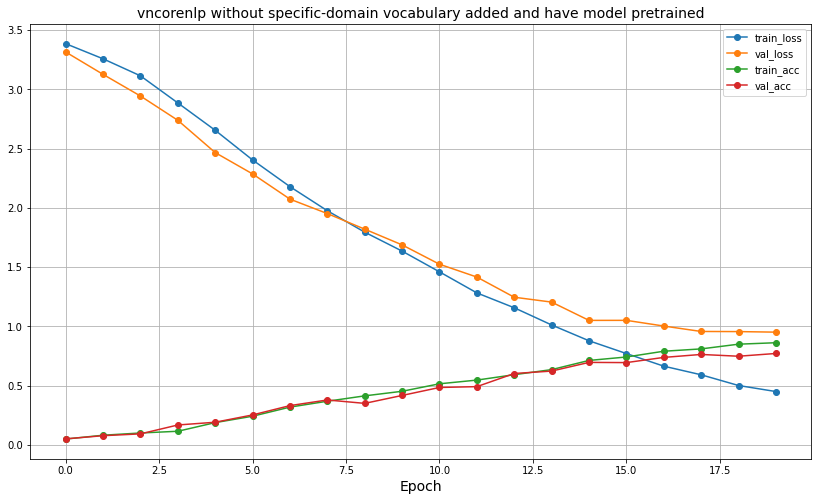

In [ ]:
log = [{'epoch': 0, 'train loss': 3.3847051624740874, 'val loss': 3.314468594959804, 'train accuracy': 0.04954117063492063, 'val accuracy': 0.05095046082949309, 'train f1_score': 0.04484523435361583, 'val f1_score': 0.03462444637415836}, {'epoch': 1, 'train loss': 3.257085463830403, 'val loss': 3.125730037689209, 'train accuracy': 0.08167989417989419, 'val accuracy': 0.07773617511520738, 'train f1_score': 0.0664882664876618, 'val f1_score': 0.04583830011384682}, {'epoch': 2, 'train loss': 3.1134223639965057, 'val loss': 2.9431999206542967, 'train accuracy': 0.10054976851851852, 'val accuracy': 0.09308755760368663, 'train f1_score': 0.07993518370874043, 'val f1_score': 0.05585367718807873}, {'epoch': 3, 'train loss': 2.884831121989659, 'val loss': 2.7383272784096855, 'train accuracy': 0.11511036706349206, 'val accuracy': 0.16805875576036866, 'train f1_score': 0.09412002895586194, 'val f1_score': 0.11585738961200416}, {'epoch': 4, 'train loss': 2.65404643544129, 'val loss': 2.4659557172230313, 'train accuracy': 0.1881097056878307, 'val accuracy': 0.1912442396313364, 'train f1_score': 0.16426192428393474, 'val f1_score': 0.17021308616028558}, {'epoch': 5, 'train loss': 2.4037278102976933, 'val loss': 2.2859632934842793, 'train accuracy': 0.2419911541005291, 'val accuracy': 0.25288018433179726, 'train f1_score': 0.22276264668487183, 'val f1_score': 0.20738622825718753}, {'epoch': 6, 'train loss': 2.1785623473780498, 'val loss': 2.0732593979154315, 'train accuracy': 0.3188760747354497, 'val accuracy': 0.3315668202764977, 'train f1_score': 0.30618609494796684, 'val f1_score': 0.29258425410355127}, {'epoch': 7, 'train loss': 1.9753991046122141, 'val loss': 1.9514736141477311, 'train accuracy': 0.3684895833333333, 'val accuracy': 0.3790322580645161, 'train f1_score': 0.34874067448153073, 'val f1_score': 0.3534942734667646}, {'epoch': 8, 'train loss': 1.7945547444479806, 'val loss': 1.8199308497565134, 'train accuracy': 0.4137421461640211, 'val accuracy': 0.3503744239631337, 'train f1_score': 0.4145005346494032, 'val f1_score': 0.34327277179858334}, {'epoch': 9, 'train loss': 1.6349304871899741, 'val loss': 1.6873989718300955, 'train accuracy': 0.45240162037037035, 'val accuracy': 0.41725230414746545, 'train f1_score': 0.44839241100237687, 'val f1_score': 0.38515412798606924}, {'epoch': 10, 'train loss': 1.4599456521017211, 'val loss': 1.5241564018385751, 'train accuracy': 0.515562996031746, 'val accuracy': 0.4844758064516129, 'train f1_score': 0.5079886728693517, 'val f1_score': 0.47328810080690675}, {'epoch': 11, 'train loss': 1.282274994466986, 'val loss': 1.4159661786896842, 'train accuracy': 0.546761326058201, 'val accuracy': 0.49156105990783405, 'train f1_score': 0.5591439902650056, 'val f1_score': 0.4923571080282667}, {'epoch': 12, 'train loss': 1.1568922357899802, 'val loss': 1.2458143319402422, 'train accuracy': 0.5923239087301587, 'val accuracy': 0.6023329493087558, 'train f1_score': 0.5988825416594705, 'val f1_score': 0.6141350808971607}, {'epoch': 13, 'train loss': 1.0118781998753548, 'val loss': 1.2047365580286298, 'train accuracy': 0.6351893187830687, 'val accuracy': 0.622811059907834, 'train f1_score': 0.6440725586988388, 'val f1_score': 0.6328192365326836}, {'epoch': 14, 'train loss': 0.8785351371126515, 'val loss': 1.0504880785942077, 'train accuracy': 0.7125806051587301, 'val accuracy': 0.6961117511520737, 'train f1_score': 0.7192706120339739, 'val f1_score': 0.7040181784421415}, {'epoch': 15, 'train loss': 0.7706519905477762, 'val loss': 1.050779598099845, 'train accuracy': 0.7416501322751322, 'val accuracy': 0.6943260368663594, 'train f1_score': 0.7519083093885985, 'val f1_score': 0.6962536604516986}, {'epoch': 16, 'train loss': 0.6642841619572469, 'val loss': 1.0026915243693761, 'train accuracy': 0.7902509093915343, 'val accuracy': 0.7381048387096774, 'train f1_score': 0.7967095977838812, 'val f1_score': 0.742886393110004}, {'epoch': 17, 'train loss': 0.5915534264807191, 'val loss': 0.9570056106363024, 'train accuracy': 0.8099061673280422, 'val accuracy': 0.7631048387096774, 'train f1_score': 0.8191209746951315, 'val f1_score': 0.7757110357960012}, {'epoch': 18, 'train loss': 0.5011014620374356, 'val loss': 0.9559399604797363, 'train accuracy': 0.8496817129629629, 'val accuracy': 0.7480702764976959, 'train f1_score': 0.8591879675657307, 'val f1_score': 0.7501217847372801}, {'epoch': 19, 'train loss': 0.4501504840861474, 'val loss': 0.9512301615306309, 'train accuracy': 0.8619584986772486, 'val accuracy': 0.7713133640552995, 'train f1_score': 0.8696023779325655, 'val f1_score': 0.7736749687232967}]

show_learning_curve(log)

# With pretraining

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/BIZZI/nlp_task/category_classification
# %cd /content/drive/MyDrive/category_classification

In [ ]:
!python3 main.py -epochs 25 -lr 2e-5

## Lần 1

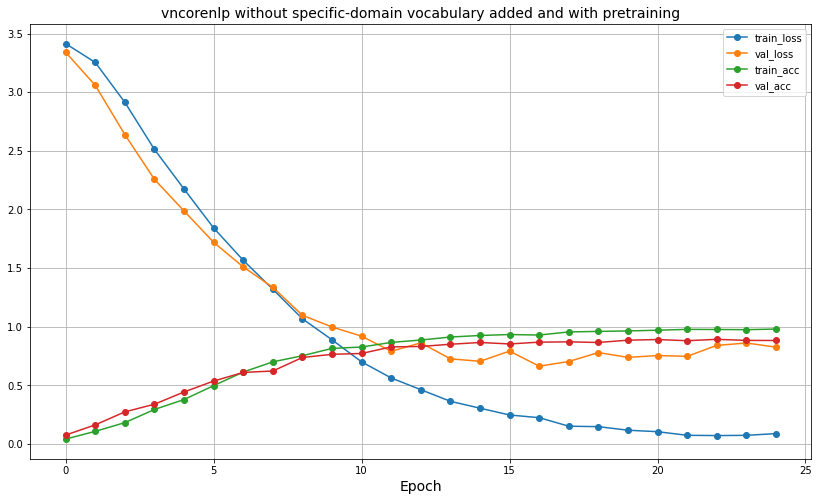

In [ ]:
log = [
       {"epoch": 0, "train loss":3.4135230098451887, "val loss": 3.339795, "train accuracy": 0.042741,  "val accuracy": 0.076815, "train f1_score": 0.031102, "val f1_score": 0.042888},
       {"epoch": 1, "train loss": 3.2532420371259962, "val loss": 3.057982, "train accuracy": 0.108342,  "val accuracy": 0.163566, "train f1_score": 0.077856, "val f1_score": 0.122896},
       {"epoch": 2, "train loss": 2.9129169625895366, "val loss": 2.637921, "train accuracy": 0.182767,  "val accuracy": 0.274482, "train f1_score": 0.152845, "val f1_score": 0.250423},
       {"epoch": 3, "train loss": 2.511620044708252, "val loss": 2.256212, "train accuracy": 0.294829,  "val accuracy": 0.339574, "train f1_score": 0.274019, "val f1_score": 0.296953},
       {"epoch": 4, "train loss": 2.173903531261853, "val loss": 1.986945, "train accuracy": 0.379702,  "val accuracy": 0.444153, "train f1_score": 0.356228, "val f1_score": 0.421277},
       {"epoch": 5, "train loss": 1.8419538619262832, "val loss": 1.719837, "train accuracy": 0.497985,  "val accuracy": 0.537183, "train f1_score": 0.487672, "val f1_score": 0.528196},
       {"epoch": 6, "train loss": 1.5666126140526362, "val loss": 1.510335, "train accuracy": 0.613984,  "val accuracy": 0.610570, "train f1_score": 0.624422, "val f1_score": 0.612573},
       {"epoch": 7, "train loss": 1.3194825878100735, "val loss": 1.335801, "train accuracy": 0.700728,  "val accuracy": 0.622725, "train f1_score": 0.709778, "val f1_score": 0.637747},
       {"epoch": 8, "train loss": 1.0678078952644552, "val loss": 1.097545, "train accuracy": 0.752883,  "val accuracy": 0.738191, "train f1_score": 0.765034, "val f1_score": 0.743190},
       {"epoch": 9, "train loss": 0.888658728982721, "val loss": 0.998287, "train accuracy": 0.815590,  "val accuracy": 0.764948, "train f1_score": 0.825425, "val f1_score": 0.779448},
       {"epoch": 10, "train loss": 0.700545357806342, "val loss": 0.919665, "train accuracy": 0.827133,  "val accuracy": 0.772177, "train f1_score": 0.838508, "val f1_score": 0.781053},
       {"epoch": 11, "train loss": 0.5634736578379359, "val loss": 0.790894, "train accuracy": 0.866526,  "val accuracy": 0.828399, "train f1_score": 0.875961, "val f1_score": 0.836455},
       {"epoch": 12, "train loss": 0.46360710569258246, "val loss": 0.862759, "train accuracy": 0.886843,  "val accuracy": 0.832028, "train f1_score": 0.894713, "val f1_score": 0.832903},
       {"epoch": 13, "train loss": 0.36444851343653034, "val loss": 0.726604, "train accuracy": 0.912337,  "val accuracy": 0.850778, "train f1_score": 0.919563, "val f1_score": 0.859281},
       {"epoch": 14, "train loss": 0.30571370385587215, "val loss": 0.705425, "train accuracy": 0.925678,  "val accuracy": 0.865956, "train f1_score": 0.931172, "val f1_score": 0.874706},
       {"epoch": 15, "train loss": 0.2477518046008689, "val loss": 0.792392, "train accuracy": 0.933666,  "val accuracy": 0.853399, "train f1_score": 0.938039, "val f1_score": 0.855126},
       {"epoch": 16, "train loss": 0.22475860726886562, "val loss": 0.663889, "train accuracy": 0.929408,  "val accuracy": 0.868664, "train f1_score": 0.933458, "val f1_score": 0.874927},
       {"epoch": 17, "train loss": 0.1522195871387209,"val loss": 0.703736, "train accuracy": 0.955812,  "val accuracy": 0.871313, "train f1_score": 0.959099, "val f1_score": 0.877722},
       {"epoch": 18, "train loss": 0.14828875930314617, "val loss": 0.779953, "train accuracy": 0.960328,  "val accuracy": 0.865899, "train f1_score": 0.962643, "val f1_score": 0.865149},
       {"epoch": 19, "train loss": 0.11792378380362477, "val loss": 0.739039, "train accuracy": 0.964234,  "val accuracy": 0.885599, "train f1_score": 0.966599, "val f1_score": 0.886692},
       {"epoch": 20, "train loss": 0.10530680492852948, "val loss": 0.754611, "train accuracy": 0.970600,  "val accuracy": 0.891014, "train f1_score": 0.971436, "val f1_score": 0.889982},
       {"epoch": 21, "train loss": 0.0745640079590625,"val loss": 0.747873, "train accuracy": 0.977803,  "val accuracy": 0.881135, "train f1_score": 0.978727, "val f1_score": 0.884025},
       {"epoch": 22, "train loss": 0.07224203477380797, "val loss": 0.840918, "train accuracy": 0.976842,  "val accuracy": 0.892742, "train f1_score": 0.978589, "val f1_score": 0.896841},
       {"epoch": 23, "train loss": 0.074198277168242, "val loss": 0.861557, "train accuracy": 0.975167,  "val accuracy": 0.883756, "train f1_score": 0.976415, "val f1_score": 0.878937},
       {"epoch": 24, "train loss": 0.08908374390531597, "val loss": 0.826471, "train accuracy": 0.980469,  "val accuracy": 0.882949, "train f1_score": 0.980105, "val f1_score": 0.880886}
]

train_loss = [
              each["train loss"] for each in log
]
val_loss = [
            each["val loss"] for each in log
]
train_acc = [
             each["train accuracy"] for each in log
]
val_acc = [
           each["val accuracy"] for each in log
]

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(14, 8))

epochs = len(train_loss)
plt.plot(np.arange(epochs), train_loss, marker='o', label='train_loss')
plt.plot(np.arange(epochs), val_loss, marker='o', label='val_loss')
plt.plot(np.arange(epochs), train_acc, marker='o', label='train_acc')
plt.plot(np.arange(epochs), val_acc, marker='o', label='val_acc')
# plt.plot(np.arange(epochs), train_f1_score, marker='o', label='train_f1_score')
# plt.plot(np.arange(epochs), val_f1_score, marker='o', label='val_f1_score')
plt.title('vncorenlp without specific-domain vocabulary added and with pretraining', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.grid(True)
ax.legend()
plt.show();

## Lần 2

In [ ]:
!python3 main.py -epochs 25 -lr 2e-5

Device: cuda
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly in

## Lần 3

In [ ]:
!python3 main.py -epochs 25 -lr 2e-5

Device: cuda
Downloading: 100% 557/557 [00:00<00:00, 602kB/s]
Downloading: 100% 518M/518M [00:08<00:00, 65.9MB/s]
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenc

In [ ]:
# {"epoch": 25,"train loss": 0.029880970450384275,"val loss": 0.819035,"train accuracy": 0.991629,"val accuracy": 0.891071,"train f1_score": 0.991950,"val f1_score": 0.894999}


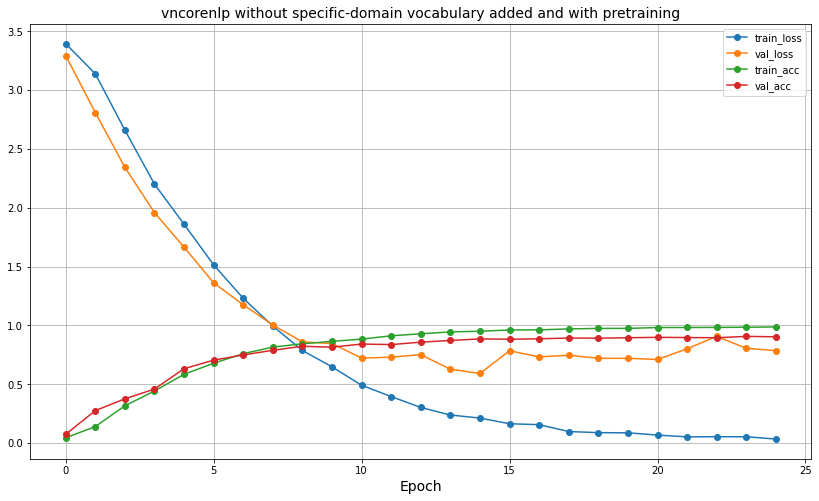

In [ ]:
log = [
       {"epoch": 0,  "train loss": 3.3945098178727284, "val loss": 3.293653, "train accuracy": 0.045532,  "val accuracy": 0.075029, "train f1_score": 0.030011, "val f1_score": 0.036777},
       {"epoch": 1,  "train loss": 3.138564026781491, "val loss": 2.809139, "train accuracy": 0.140201,  "val accuracy": 0.276123, "train f1_score": 0.106919, "val f1_score": 0.221261},
       {"epoch": 2,  "train loss": 2.659693854195731, "val loss": 2.343971, "train accuracy": 0.317233,  "val accuracy": 0.376325, "train f1_score": 0.277630, "val f1_score": 0.336519},
       {"epoch": 3,  "train loss": 2.2010284108775005, "val loss": 1.958990, "train accuracy": 0.442564,  "val accuracy": 0.459217, "train f1_score": 0.426223, "val f1_score": 0.434950},
       {"epoch": 4,  "train loss": 1.8600865708930152, "val loss": 1.665030, "train accuracy": 0.585193,  "val accuracy": 0.632632, "train f1_score": 0.588221, "val f1_score": 0.632098},
       {"epoch": 5,  "train loss": 1.514632181397506, "val loss": 1.361502, "train accuracy": 0.678737,  "val accuracy": 0.705069, "train f1_score": 0.679495, "val f1_score": 0.709379},
       {"epoch": 6,  "train loss": 1.2306018306740694, "val loss": 1.176083, "train accuracy": 0.760169,  "val accuracy": 0.749078, "train f1_score": 0.773887, "val f1_score": 0.757761},
       {"epoch": 7,  "train loss": 0.9943354151078633, "val loss": 1.003618, "train accuracy": 0.816096,  "val accuracy": 0.789055, "train f1_score": 0.825711, "val f1_score": 0.797206},
       {"epoch": 8,  "train loss": 0.7871862181595394, "val loss": 0.860173, "train accuracy": 0.844050,  "val accuracy": 0.823041, "train f1_score": 0.854798, "val f1_score": 0.825647},
       {"epoch": 9,  "train loss": 0.6479379643819162, "val loss": 0.846132, "train accuracy": 0.864749,  "val accuracy": 0.815121, "train f1_score": 0.873346, "val f1_score": 0.828559},
       {"epoch": 10, "train loss": 0.4914404380002192, "val loss": 0.722315, "train accuracy": 0.883722,  "val accuracy": 0.841820, "train f1_score": 0.892613, "val f1_score": 0.850643},
       {"epoch": 11, "train loss": 0.39553811454347204, "val loss": 0.730210, "train accuracy": 0.911954,  "val accuracy": 0.837414, "train f1_score": 0.918016, "val f1_score": 0.843548},
       {"epoch": 12, "train loss": 0.3027820520635162, "val loss": 0.751646, "train accuracy": 0.929357,  "val accuracy": 0.857921, "train f1_score": 0.933500, "val f1_score": 0.860796},
       {"epoch": 13, "train loss": 0.23869518356929934, "val loss": 0.627621, "train accuracy": 0.945033,  "val accuracy": 0.872264, "train f1_score": 0.949337, "val f1_score": 0.879108},
       {"epoch": 14, "train loss": 0.21279534411483578, "val loss": 0.591698, "train accuracy": 0.950562,  "val accuracy": 0.885657, "train f1_score": 0.953920, "val f1_score": 0.892369},
       {"epoch": 15, "train loss": 0.16457505131672537, "val loss": 0.784843, "train accuracy": 0.961392,  "val accuracy": 0.882863, "train f1_score": 0.963233, "val f1_score": 0.881428},
       {"epoch": 16, "train loss": 0.15663910367792205, "val loss": 0.732784, "train accuracy": 0.962612,  "val accuracy": 0.886521, "train f1_score": 0.964678, "val f1_score": 0.890638},
       {"epoch": 17, "train loss": 0.09828769367387784, "val loss": 0.747117, "train accuracy": 0.970372,  "val accuracy": 0.892742, "train f1_score": 0.971583, "val f1_score": 0.892552},
       {"epoch": 18, "train loss": 0.08882007408621055, "val loss": 0.720441, "train accuracy": 0.974785,  "val accuracy": 0.891791, "train f1_score": 0.975868, "val f1_score": 0.891594},
       {"epoch": 19, "train loss": 0.08736402589628207, "val loss": 0.720447, "train accuracy": 0.975116,  "val accuracy": 0.895392, "train f1_score": 0.975859, "val f1_score": 0.898641},
       {"epoch": 20, "train loss": 0.068321921297216, "val loss": 0.710750, "train accuracy": 0.982143,  "val accuracy": 0.899050, "train f1_score": 0.982620, "val f1_score": 0.898257},
       {"epoch": 21, "train loss": 0.0530151235871017, "val loss": 0.801992, "train accuracy": 0.982649,  "val accuracy": 0.897235, "train f1_score": 0.983685, "val f1_score": 0.894440},
       {"epoch": 22, "train loss": 0.054431599124135185, "val loss": 0.906591, "train accuracy": 0.983259,  "val accuracy": 0.895392, "train f1_score": 0.983792, "val f1_score": 0.899895},
       {"epoch": 23, "train loss": 0.0540495160800804, "val loss": 0.806076, "train accuracy": 0.984933,  "val accuracy": 0.906999, "train f1_score": 0.985233, "val f1_score": 0.905474},
       {"epoch": 24, "train loss": 0.034647619272748544, "val loss": 0.785591, "train accuracy": 0.986886,  "val accuracy": 0.903456, "train f1_score": 0.987292, "val f1_score": 0.903885},
]


train_loss = [
              each["train loss"] for each in log
]
val_loss = [
            each["val loss"] for each in log
]
train_acc = [
             each["train accuracy"] for each in log
]
val_acc = [
           each["val accuracy"] for each in log
]

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(14, 8))

epochs = len(train_loss)
plt.plot(np.arange(epochs), train_loss, marker='o', label='train_loss')
plt.plot(np.arange(epochs), val_loss, marker='o', label='val_loss')
plt.plot(np.arange(epochs), train_acc, marker='o', label='train_acc')
plt.plot(np.arange(epochs), val_acc, marker='o', label='val_acc')
# plt.plot(np.arange(epochs), train_f1_score, marker='o', label='train_f1_score')
# plt.plot(np.arange(epochs), val_f1_score, marker='o', label='val_f1_score')
plt.title('vncorenlp without specific-domain vocabulary added and with pretraining', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.grid(True)
ax.legend()
plt.show();

In [ ]:
# pretraining
{"epoch": 14, "train loss": 0.21279534411483578, "val loss": 0.591698, "train accuracy": 0.950562,  "val accuracy": 0.885657, "train f1_score": 0.953920, "val f1_score": 0.892369},

# without pretraining
{"epoch": 13,"train loss": 0.2868660770223609,"val loss": 0.623342,"train accuracy": 0.935495,"val accuracy": 0.879291,"train f1_score": 0.939800,"val f1_score": 0.884587},


## Lần 4

In [ ]:
!python3 main.py -epochs 20 -lr 2e-5

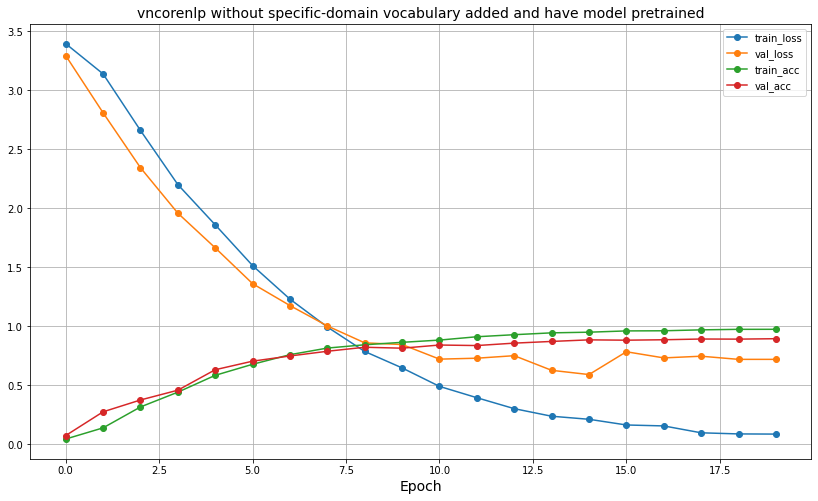

In [ ]:
log = [
       {"epoch": 0 , "train loss": 3.3945098178727284, "val loss": 3.293653, "train accuracy": 0.045532,  "val accuracy": 0.075029, "train f1_score": 0.030011, "val f1_score": 0.036777},
       {"epoch": 1 , "train loss": 3.138564026781491, "val loss": 2.809139, "train accuracy": 0.140201,  "val accuracy": 0.276123, "train f1_score": 0.106919, "val f1_score": 0.221261},
       {"epoch": 2 , "train loss": 2.659693854195731, "val loss": 2.343971, "train accuracy": 0.317233,  "val accuracy": 0.376325, "train f1_score": 0.277630, "val f1_score": 0.336519},
       {"epoch": 3 , "train loss": 2.2010284108775005, "val loss": 1.958990, "train accuracy": 0.442564,  "val accuracy": 0.459217, "train f1_score": 0.426223, "val f1_score": 0.434950},
       {"epoch": 4 , "train loss": 1.8600865708930152, "val loss": 1.665030, "train accuracy": 0.585193,  "val accuracy": 0.632632, "train f1_score": 0.588221, "val f1_score": 0.632098},
       {"epoch": 5 , "train loss": 1.514632181397506, "val loss": 1.361502, "train accuracy": 0.678737,  "val accuracy": 0.705069, "train f1_score": 0.679495, "val f1_score": 0.709379},
       {"epoch": 6 , "train loss": 1.2306018306740694, "val loss": 1.176083, "train accuracy": 0.760169,  "val accuracy": 0.749078, "train f1_score": 0.773887, "val f1_score": 0.757761},
       {"epoch": 7 , "train loss": 0.9943354151078633, "val loss": 1.003618, "train accuracy": 0.816096,  "val accuracy": 0.789055, "train f1_score": 0.825711, "val f1_score": 0.797206},
       {"epoch": 8 , "train loss": 0.7871862181595394, "val loss": 0.860173, "train accuracy": 0.844050,  "val accuracy": 0.823041, "train f1_score": 0.854798, "val f1_score": 0.825647},
       {"epoch": 9 , "train loss": 0.6479379643819162, "val loss": 0.846132, "train accuracy": 0.864749,  "val accuracy": 0.815121, "train f1_score": 0.873346, "val f1_score": 0.828559},
       {"epoch": 10, "train loss": 0.4914404380002192, "val loss": 0.722315, "train accuracy": 0.883722,  "val accuracy": 0.841820, "train f1_score": 0.892613, "val f1_score": 0.850643},
       {"epoch": 11, "train loss": 0.39553811454347204, "val loss": 0.730210, "train accuracy": 0.911954,  "val accuracy": 0.837414, "train f1_score": 0.918016, "val f1_score": 0.843548},
       {"epoch": 12, "train loss": 0.3027820520635162, "val loss": 0.751646, "train accuracy": 0.929357,  "val accuracy": 0.857921, "train f1_score": 0.933500, "val f1_score": 0.860796},
       {"epoch": 13, "train loss": 0.23869518356929934, "val loss": 0.627621, "train accuracy": 0.945033,  "val accuracy": 0.872264, "train f1_score": 0.949337, "val f1_score": 0.879108},
       {"epoch": 14, "train loss": 0.21279534411483578, "val loss": 0.591698, "train accuracy": 0.950562,  "val accuracy": 0.885657, "train f1_score": 0.953920, "val f1_score": 0.892369},
       {"epoch": 15, "train loss": 0.16457505131672537, "val loss": 0.784843, "train accuracy": 0.961392,  "val accuracy": 0.882863, "train f1_score": 0.963233, "val f1_score": 0.881428},
       {"epoch": 16, "train loss": 0.15663910367792205, "val loss": 0.732784, "train accuracy": 0.962612,  "val accuracy": 0.886521, "train f1_score": 0.964678, "val f1_score": 0.890638},
       {"epoch": 17, "train loss": 0.09828769367387784, "val loss": 0.747117, "train accuracy": 0.970372,  "val accuracy": 0.892742, "train f1_score": 0.971583, "val f1_score": 0.892552},
       {"epoch": 18, "train loss": 0.08882007408621055, "val loss": 0.720441, "train accuracy": 0.974785,  "val accuracy": 0.891791, "train f1_score": 0.975868, "val f1_score": 0.891594},
       {"epoch": 19, "train loss": 0.08736402589628207, "val loss": 0.720447, "train accuracy": 0.975116,  "val accuracy": 0.895392, "train f1_score": 0.975859, "val f1_score": 0.898641}
]

train_loss = [
              each["train loss"] for each in log
]
val_loss = [
            each["val loss"] for each in log
]
train_acc = [
             each["train accuracy"] for each in log
]
val_acc = [
           each["val accuracy"] for each in log
]



fig, ax = plt.subplots(figsize=(14, 8))

epochs = len(train_loss)
plt.plot(np.arange(epochs), train_loss, marker='o', label='train_loss')
plt.plot(np.arange(epochs), val_loss, marker='o', label='val_loss')
plt.plot(np.arange(epochs), train_acc, marker='o', label='train_acc')
plt.plot(np.arange(epochs), val_acc, marker='o', label='val_acc')
# plt.plot(np.arange(epochs), train_f1_score, marker='o', label='train_f1_score')
# plt.plot(np.arange(epochs), val_f1_score, marker='o', label='val_f1_score')
plt.title('vncorenlp without specific-domain vocabulary added and have model pretrained', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.grid(True)
ax.legend()
plt.show();

## Lần 5

In [10]:
# Luong Nam phase 1 
!python3 main.py -epochs 20 -lr 2e-5

Device: cuda
{'device': 'cuda', 'learning rate': 2e-05}
100% 112/112 [00:55<00:00,  2.01it/s]

Epoch 0: train loss: 3.396393812128476, val loss: 3.342946, train accuracy: 0.018694,  val accuracy: 0.031250, train f1_score: 0.011994, val f1_score: 0.009666
100% 112/112 [00:53<00:00,  2.08it/s]

Epoch 1: train loss: 3.36732617020607, val loss: 3.336814, train accuracy: 0.048270,  val accuracy: 0.043779, train f1_score: 0.034710, val f1_score: 0.016082
100% 112/112 [00:53<00:00,  2.10it/s]

Epoch 2: train loss: 3.222040370106697, val loss: 3.062188, train accuracy: 0.056010,  val accuracy: 0.060743, train f1_score: 0.044007, val f1_score: 0.035253
100% 112/112 [00:52<00:00,  2.13it/s]

Epoch 3: train loss: 3.0235283502510617, val loss: 2.889281, train accuracy: 0.071480,  val accuracy: 0.055357, train f1_score: 0.055061, val f1_score: 0.034679
100% 112/112 [00:52<00:00,  2.12it/s]

Epoch 4: train loss: 2.8633218790803636, val loss: 2.646371, train accuracy: 0.101562,  val accuracy: 0.14202

# Start training

## Phase 1

In [ ]:
!ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
checkpoints			    main.py
config.py			    phobert-base-finetuned-domain-specific
dataset				    pretrain_masked_language_model
datasets.py			    __pycache__
language_model_pretrained	    requirements.txt
libs.py				    utils.py
main_category_classification.ipynb  vncorenlp


In [ ]:
!python3 main.py -epochs 14 -lr 2e-5

Device: cuda
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly in

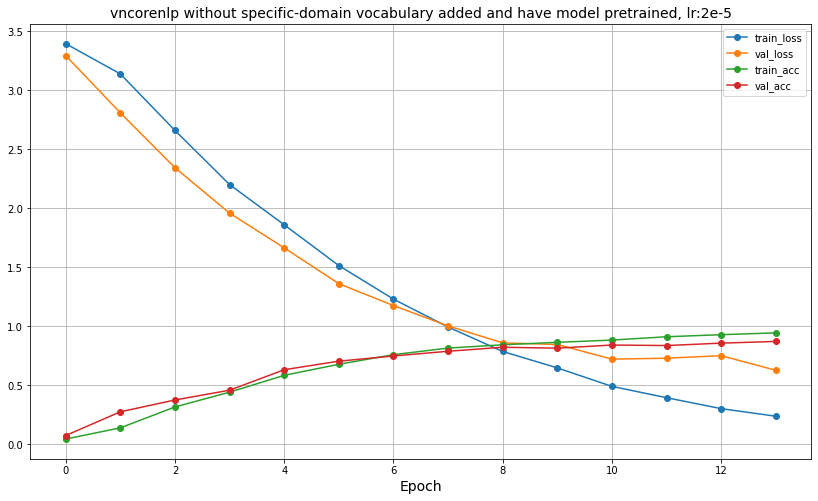

In [ ]:
with open("./checkpoints/2022-03-22-pretrained-vncorenlp-original-vocab/log.json", "r") as f:
    log = json.loads(f.read())

epochs = len(log["train_loss"])
fig, ax = plt.subplots(figsize=(14, 8))

plt.plot(np.arange(epochs), log["train_loss"], marker='o', label='train_loss')
plt.plot(np.arange(epochs), log["val_loss"], marker='o', label='val_loss')
plt.plot(np.arange(epochs), log["train_acc"], marker='o', label='train_acc')
plt.plot(np.arange(epochs), log["val_acc"], marker='o', label='val_acc')
plt.title('vncorenlp without specific-domain vocabulary added and have model pretrained, lr:2e-5', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.grid(True)
ax.legend()
plt.show();

## Phase 2

In [ ]:
!ls

checkpoints			    main.py
config.py			    phobert-base-finetuned-domain-specific
dataset				    pretrain_masked_language_model
datasets.py			    __pycache__
language_model_pretrained	    requirements.txt
libs.py				    utils.py
main_category_classification.ipynb  vncorenlp


In [ ]:
{
    "epoch": 13,
    "train loss": 0.23869518356929934,
    "val loss": 0.6276209365044322,
    "train accuracy": 0.9450334821428571,
    "val accuracy": 0.8722638248847926,
    "train f1_score": 0.9493368504890302,
    "val f1_score": 0.8791078997487407
  }

In [ ]:
!python3 main.py -epochs 5 -lr 1e-7

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
  File "main.py", line 59
    with open("test_data.txt", )
                               ^
SyntaxError: invalid syntax


In [ ]:
with open("./checkpoints/2022-03-22-pretrained-vncorenlp-original-vocab-phase-1/log.json", "r") as f:
    log = json.loads(f.read())

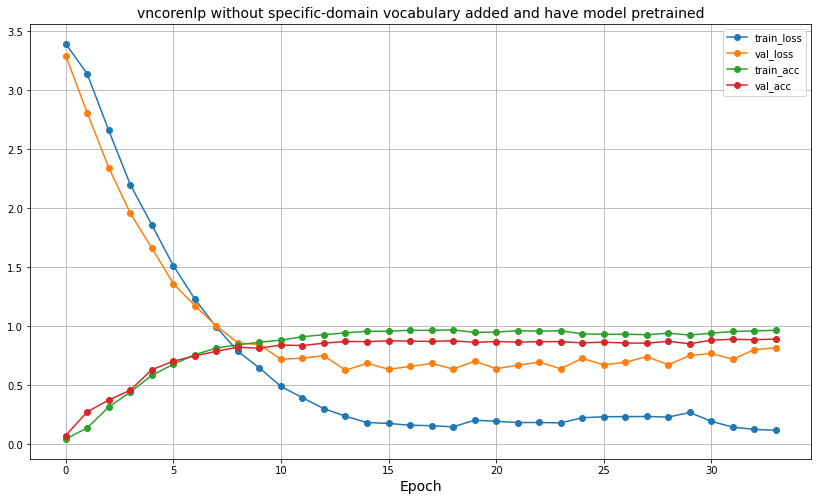

In [ ]:
log += [{'epoch': 14, 'train loss': 0.2703240611590445, 'val loss': 0.753246038726398, 'train accuracy': 0.9265666335978836, 'val accuracy': 0.8525921658986175, 'train f1_score': 0.9300065048408721, 'val f1_score': 0.8580226527504752}, {'epoch': 15, 'train loss': 0.19569822008322393, 'val loss': 0.7702258552823747, 'train accuracy': 0.9425223214285714, 'val accuracy': 0.8829493087557604, 'train f1_score': 0.9460866854793076, 'val f1_score': 0.8781090517585334}, {'epoch': 16, 'train loss': 0.1460349571758083, 'val loss': 0.7211028503520148, 'train accuracy': 0.9564732142857143, 'val accuracy': 0.8909850230414746, 'train f1_score': 0.959474279389978, 'val f1_score': 0.8911184108437343}, {'epoch': 17, 'train loss': 0.12769460117643966, 'val loss': 0.8026913945163999, 'train accuracy': 0.9620535714285714, 'val accuracy': 0.8864055299539171, 'train f1_score': 0.962438476652968, 'val f1_score': 0.8868338233471328}, {'epoch': 18, 'train loss': 0.11902740662584879, 'val loss': 0.81824025703328, 'train accuracy': 0.9661354993386243, 'val accuracy': 0.8927419354838709, 'train f1_score': 0.968812124446507, 'val f1_score': 0.8883624866876596}]


train_loss = [
              each["train loss"] for each in log
]
val_loss = [
            each["val loss"] for each in log
]
train_acc = [
             each["train accuracy"] for each in log
]
val_acc = [
           each["val accuracy"] for each in log
]



fig, ax = plt.subplots(figsize=(14, 8))

epochs = len(train_loss)
plt.plot(np.arange(epochs), train_loss, marker='o', label='train_loss')
plt.plot(np.arange(epochs), val_loss, marker='o', label='val_loss')
plt.plot(np.arange(epochs), train_acc, marker='o', label='train_acc')
plt.plot(np.arange(epochs), val_acc, marker='o', label='val_acc')
# plt.plot(np.arange(epochs), train_f1_score, marker='o', label='train_f1_score')
# plt.plot(np.arange(epochs), val_f1_score, marker='o', label='val_f1_score')
plt.title('vncorenlp without specific-domain vocabulary added and have model pretrained', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.grid(True)
ax.legend()
plt.show();

In [ ]:
!python3 main.py -epochs 5 -lr 2e-5

Device: cuda
['Bánh kẹo', 'Chiết khấu - hoa hồng - công nợ', 'Chăm sóc bé', 'Chăm sóc cơ thể', 'Chăm sóc mặt', 'Chăm sóc răng miệng', 'Chăm sóc tóc', 'Code', 'Công nghệ hóa chất', 'Cơ khí - VLXD', 'Di chuyển - vận chuyển', 'Doanh thu', 'Gia vị & sốt', 'Gạo & các loại hạt', 'Nhiên liệu', 'Nhà cửa - Đời sống', 'Other', 'Phí dịch vụ', 'Rau củ', 'Sữa', 'Thực phẩm bảo quản mát', 'Thực phẩm dinh dưỡng', 'Thực phẩm ăn liền & đóng hộp', 'Thực phẩm đông lạnh', 'Trái Cây', 'Trái cây', 'Trứng/thịt/cá', 'Văn phòng phẩm', 'Y tế', 'Điện tử', 'Đồ uống']


In [ ]:
from datasets import CustomDataset

In [ ]:
with open("test_data.txt", "r") as f:
    test_data = f.read().split("\n")
    print(len(test_data))
    test_sentences, test_labels = [], []
    for line in test_data:
        try:
            sent, label = line.strip().split("\t")
            test_sentences.append(sent)
            test_labels.append(label)
        except:
            print(line)
            pass

    

902
Tiền tối thiểu tháng :
Hóa chất Methyl myristate, 99%
Caustic soda flake (Xút-NaOH) 25kg/bao   
THIẾT BỊ HỘI NGHỊ TRUYỀN HÌNH VOXBOX (XUẤT HÓA ĐƠN THEO PO SỐ:
Hoá chất Sterikon plus Bioindicator
110274, 15 amp/hộp (Merck)
Phần mềm Illustrator CC for teams ALL Multiple Platforms Multi Asian Languages Team Licensing


In [ ]:
902 - 895

7

In [ ]:
# Luong Nam phase 1
!python3 main.py -epochs 20 -lr 2e-5

# Analysis

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from vncorenlp import VnCoreNLP

In [ ]:
with open("test_dataset.json", "r") as f:
    test_dataset = json.loads(f.read())
    

In [ ]:
model_checkpoint = "vinai/phobert-base"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(
    "./checkpoints/2022-03-22-pretrained-vncorenlp-original-vocab-phase-1"
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
word_segmenter = VnCoreNLP(
            "./vncorenlp/VnCoreNLP-1.1.1.jar",
            annotators="wseg",
            max_heap_size="-Xmx500m",
        )
def preprocess_sent(sent):
    sent = sent.strip().lower()
    sent = " ".join(word_segmenter.tokenize(sent)[0])
    return sent


'tương_ớt nam dương horeca chai nhựa 800g'

In [ ]:
seq_classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

In [ ]:
sent = "Tương Ớt Nam Dương Horeca Chai Nhựa 800G"
sent = preprocess_sent(sent)

seq_classifier(sent)

[{'label': 'Gia vị & sốt', 'score': 0.877943217754364}]

In [ ]:
test_sentences = [each["sent"] for each in test_dataset]
test_labels = [each["label"] for each in test_dataset]

pred_labels = list(map(
    lambda sent: seq_classifier(preprocess_sent(sent))[0]["label"],
    test_sentences
))

In [ ]:
pred_labels = list(map(
    lambda label: model.config.label2id[label],
    pred_labels
))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

dict_values(['Bánh kẹo', 'Chiết khấu - hoa hồng - công nợ', 'Chăm sóc bé', 'Chăm sóc cơ thể', 'Chăm sóc mặt', 'Chăm sóc răng miệng', 'Chăm sóc tóc', 'Code', 'Công nghệ hóa chất', 'Cơ khí - VLXD', 'Di chuyển - vận chuyển', 'Doanh thu', 'Gia vị & sốt', 'Gạo & các loại hạt', 'Nhiên liệu', 'Nhà cửa - Đời sống', 'Other', 'Phí dịch vụ', 'Rau củ', 'Sữa', 'Thực phẩm bảo quản mát', 'Thực phẩm dinh dưỡng', 'Thực phẩm ăn liền & đóng hộp', 'Thực phẩm đông lạnh', 'Trái Cây', 'Trái cây', 'Trứng/thịt/cá', 'Văn phòng phẩm', 'Y tế', 'Điện tử', 'Đồ uống'])

In [ ]:
matrix = confusion_matrix(test_labels, pred_labels)
matrix = matrix / matrix.astype(np.float).sum(axis=0)

fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(matrix, linewidths=.5, cmap="Blues")
labels = model.config.id2label.values()

plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels, rotation=0);

NameError: ignored

In [ ]:
np.max(matrix)

3.6

# Test

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import json

In [ ]:
with open("./dataset/dataset-for-item-classification.json", "r") as f:
    dataset = json.loads(f.read())
sentences = list(dataset.keys())
labels = [each["label"] for each in dataset.values()]

categories = sorted(
    set(labels)
)
id2label = {index: label for index, label in enumerate(categories)}
label2id = {label: index for index, label in id2label.items()}

In [ ]:
MODEL_CHECKPOINT = "vinai/phobert-base"
model = AutoModelForSequenceClassification.from_pretrained(
        MODEL_CHECKPOINT,
        num_labels=len(categories),
        id2label=id2label,
        label2id=label2id,
    )
tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT, use_fast=True)

Downloading:   0%|          | 0.00/557 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/518M [00:00<?, ?B/s]

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

Downloading:   0%|          | 0.00/874k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
model.save_pretrained(
    "./checkpoints/original/phoBERT_base"
)
tokenizer.save_pretrained(
    "./checkpoints/original/tokenizer"
)

('./checkpoints/original/tokenizer/tokenizer_config.json',
 './checkpoints/original/tokenizer/special_tokens_map.json',
 './checkpoints/original/tokenizer/vocab.txt',
 './checkpoints/original/tokenizer/bpe.codes',
 './checkpoints/original/tokenizer/added_tokens.json')

In [ ]:
LOCAL_MODEL_CHECKPOINT = "./checkpoints/original/phoBERT_base"


In [ ]:
AutoModelForSequenceClassification.from_pretrained(
    LOCAL_MODEL_CHECKPOINT
)

In [ ]:
!ls checkpoints/original/tokenizer

added_tokens.json  special_tokens_map.json  vocab.txt
bpe.codes	   tokenizer_config.json


In [ ]:
AutoTokenizer.from_pretrained(
    "./checkpoints/original/tokenizer"
)

PreTrainedTokenizer(name_or_path='./checkpoints/original/tokenizer', vocab_size=64000, model_max_len=256, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'})